## US accidents Exploratory Data Analysis 

TODO - Talk about EDA
TODO - Talk about dataset(source, what is contains, how will it be useful)
- Kaggle
- Contains Information about US accidents
- Can be useful to predict and prevent accidents



---



---



Downloading The Data Set into the Notebook

In [ ]:
!pip install opendatasets --upgrade --quiet

In [ ]:
import opendatasets as od
url = "https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents"
od.download(url)

Skipping, found downloaded files in "./us-accidents" (use force=True to force download)


In [ ]:
file_name = "./us-accidents/US_Accidents_Dec21_updated.csv"

Importing Libraries 

In [ ]:
import pandas as pd

In [ ]:
import seaborn as sns
sns.set_style("darkgrid")

In [ ]:
import folium



---



---



## Data Prepration and Cleaning
- Load the file using Pandas
- Look at the information about the data
- Fix any missing or incorrect values



---



---



Loading the Dataset

In [ ]:
df = pd.read_csv(file_name)

Getting to know the dataset a little better by looking at the head and tail of the dataframe, datatypes of different columns and statistical information about the data

In [ ]:
df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [ ]:
df.tail()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
2845337,A-2845338,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.00248,-117.37936,33.99888,-117.37094,0.543,At Market St - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
2845338,A-2845339,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.76696,-117.14806,32.76555,-117.15363,0.338,At Camino Del Rio/Mission Center Rd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
2845339,A-2845340,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.77545,-117.84779,33.77740,-117.85727,0.561,At Glassell St/Grand Ave - Accident. in the ri...,...,False,False,False,False,False,False,Day,Day,Day,Day
2845340,A-2845341,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.99246,-118.40302,33.98311,-118.39565,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
2845341,A-2845342,2,2019-08-23 18:52:06,2019-08-23 19:21:31,34.13393,-117.23092,34.13736,-117.23934,0.537,At Highland Ave/Arden Ave - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [ ]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,1.101431e+06,2.776068e+06,2.375699e+06,2.772250e+06,2.786142e+06,2.774796e+06,2.687398e+06,2.295884e+06
mean,2.137572e+00,3.624520e+01,-9.711463e+01,3.624532e+01,-9.711439e+01,7.026779e-01,8.089408e+03,6.179356e+01,5.965823e+01,6.436545e+01,2.947234e+01,9.099391e+00,7.395044e+00,7.016940e-03
std,4.787216e-01,5.363797e+00,1.831782e+01,5.363873e+00,1.831763e+01,1.560361e+00,1.836009e+04,1.862263e+01,2.116097e+01,2.287457e+01,1.045286e+00,2.717546e+00,5.527454e+00,9.348831e-02
min,1.000000e+00,2.456603e+01,-1.245481e+02,2.456601e+01,-1.245457e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.344517e+01,-1.180331e+02,3.344628e+01,-1.180333e+02,5.200000e-02,1.270000e+03,5.000000e+01,4.600000e+01,4.800000e+01,2.931000e+01,1.000000e+01,3.500000e+00,0.000000e+00
50%,2.000000e+00,3.609861e+01,-9.241808e+01,3.609799e+01,-9.241772e+01,2.440000e-01,4.007000e+03,6.400000e+01,6.300000e+01,6.700000e+01,2.982000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.016024e+01,-8.037243e+01,4.016105e+01,-8.037338e+01,7.640000e-01,9.567000e+03,7.600000e+01,7.600000e+01,8.300000e+01,3.001000e+01,1.000000e+01,1.000000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.960000e+02,1.960000e+02,1.000000e+02,5.890000e+01,1.400000e+02,1.087000e+03,2.400000e+01


Number of Numeric Columns in the Dataset

In [ ]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numeric_df = df.select_dtypes(include=numerics)
len(numeric_df.columns)

14

Percentage of Missing Values per column

In [ ]:
missing_percentages = (df.isna().sum().sort_values(ascending = False) / len(df))*100
missing_percentages[missing_percentages != 0]

Number                   61.290031
Precipitation(in)        19.310789
Wind_Chill(F)            16.505678
Wind_Speed(mph)           5.550967
Wind_Direction            2.592834
Humidity(%)               2.568830
Weather_Condition         2.482514
Visibility(mi)            2.479350
Temperature(F)            2.434646
Pressure(in)              2.080593
Weather_Timestamp         1.783125
Airport_Code              0.335601
Timezone                  0.128596
Nautical_Twilight         0.100761
Civil_Twilight            0.100761
Sunrise_Sunset            0.100761
Astronomical_Twilight     0.100761
Zipcode                   0.046356
City                      0.004815
Street                    0.000070
dtype: float64

<Axes: title={'center': 'Percentage of Missing Values Per Column'}>

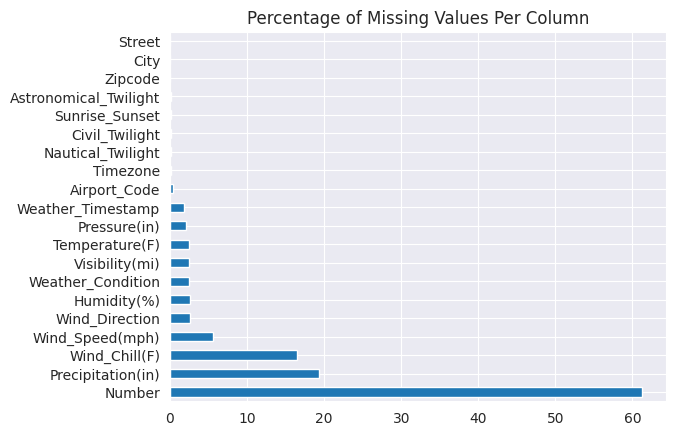

In [ ]:
missing_percentages[missing_percentages != 0].plot(kind = 'barh', title = 'Percentage of Missing Values Per Column')



---



---



## Exploratory Analysis and Visualization
In the original dataset there are 47 columns, for this EDA project I am analyzing 3 columns.

---



---


Columns to analyze :
1. City
2. Start Time
3. Start Lat, Start Long

In [ ]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

### Cities

In [ ]:
cities = df.City.unique()
len(cities)

11682

In [ ]:
cities_by_accident = df.City.value_counts()
cities_by_accident

Miami                           106966
Los Angeles                      68956
Orlando                          54691
Dallas                           41979
Houston                          39448
                                 ...  
Ridgedale                            1
Sekiu                                1
Wooldridge                           1
Bullock                              1
American Fork-Pleasant Grove         1
Name: City, Length: 11681, dtype: int64

<Axes: title={'center': '20 Cities with Highest Number of Accidents'}, xlabel='Number of Accidents', ylabel='Cities'>

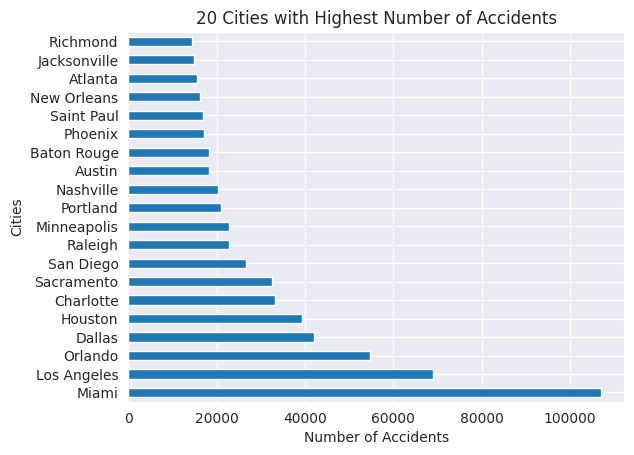

In [ ]:
cities_by_accident[:20].plot(kind = 'barh', xlabel = 'Number of Accidents', ylabel = 'Cities', title='20 Cities with Highest Number of Accidents')

The plot below show the number of accidents as per the number of cities. The data is plotted in logarithmic scale.

[Text(0.5, 0, 'Number of accidents'),
 Text(0, 0.5, 'Number of cities'),
 Text(0.5, 1.0, 'Number of Accidents')]

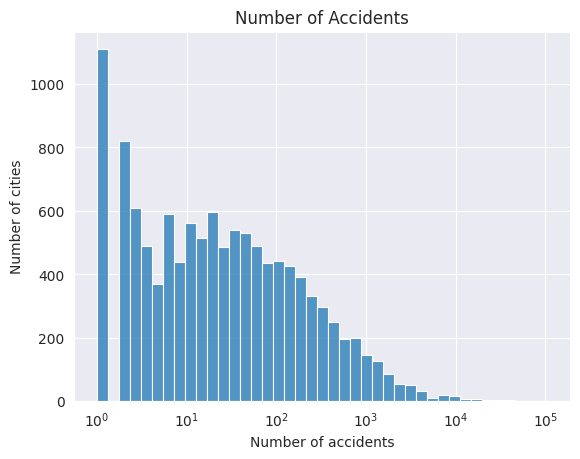

In [ ]:
sns.histplot(cities_by_accident, log_scale = True).set(xlabel='Number of accidents', ylabel = 'Number of cities', title='Number of Accidents')

By plotting the above graph we get to know that around 1100-1200 cities have only 1 accident

In [ ]:
cities_by_accident[cities_by_accident == 1]

Carney                          1
Waverly Hall                    1
Center Sandwich                 1
Glen Flora                      1
Sulphur Springs                 1
                               ..
Ridgedale                       1
Sekiu                           1
Wooldridge                      1
Bullock                         1
American Fork-Pleasant Grove    1
Name: City, Length: 1110, dtype: int64

This shows that 1110 cities have only 1 accident reported.

Distribution Insights
- I am considering cities with more than 1000 accidents as high accident cities.
- Cities with 1000 and less number of accidents are categorized as low accident cities

In [ ]:
high_accident_cities = cities_by_accident[cities_by_accident > 1000]
low_accident_cities = cities_by_accident[cities_by_accident <= 1000]

Number of High and Low accident cities

In [ ]:
len(high_accident_cities)

494

In [ ]:
len(low_accident_cities)

11187

Percentage of High Accident Cities

In [ ]:
high_percentage = (len(high_accident_cities) / len(cities)) * 100
high_percentage

4.228727957541517

[Text(0.5, 0, 'Number of Accidents'),
 Text(0, 0.5, 'Number of Cities'),
 Text(0.5, 1.0, 'High Accident Cities')]

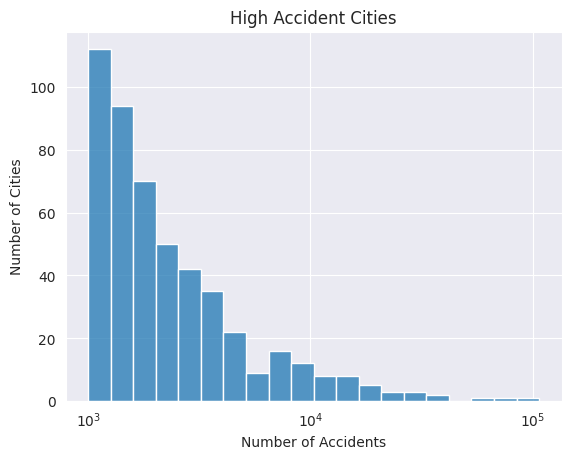

In [ ]:
sns.histplot(high_accident_cities, log_scale = True).set(xlabel = 'Number of Accidents', ylabel='Number of Cities',title='High Accident Cities')

Percentage of Low Accident Cities

In [ ]:
low_percentage = (len(low_accident_cities) / len(cities)) * 100
low_percentage

95.76271186440678

[Text(0.5, 0, 'Number of Accidents'),
 Text(0, 0.5, 'Number of Cities'),
 Text(0.5, 1.0, 'Low Accident Cities')]

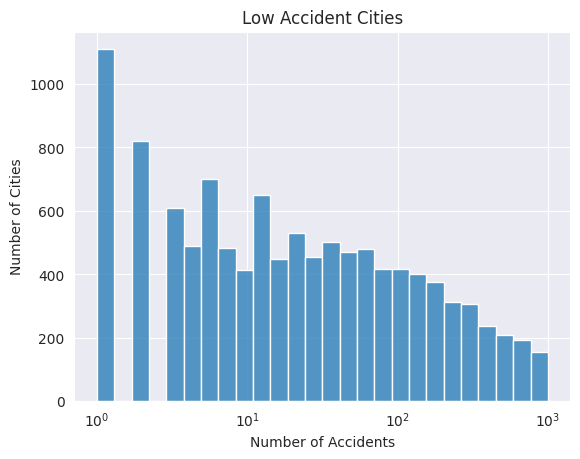

In [ ]:
sns.histplot(low_accident_cities, log_scale = True).set(xlabel = 'Number of Accidents', ylabel='Number of Cities',title='Low Accident Cities')

### Start Time

In [ ]:
df.Start_Time

0          2016-02-08 00:37:08
1          2016-02-08 05:56:20
2          2016-02-08 06:15:39
3          2016-02-08 06:51:45
4          2016-02-08 07:53:43
                  ...         
2845337    2019-08-23 18:03:25
2845338    2019-08-23 19:11:30
2845339    2019-08-23 19:00:21
2845340    2019-08-23 19:00:21
2845341    2019-08-23 18:52:06
Name: Start_Time, Length: 2845342, dtype: object

Converting the object datatype of 'Start_Time' column to Pandas date time format

In [ ]:
df.Start_Time = pd.to_datetime(df.Start_Time)

In [ ]:
df["Year"] = df.Start_Time.apply(lambda x: x.year)

In [ ]:
df['Year'].value_counts()

2021    1511745
2020     625864
2019     258615
2017     163918
2018     163176
2016     122024
Name: Year, dtype: int64

[Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'Number of Accidents'),
 Text(0.5, 1.0, 'Accidents Per Year')]

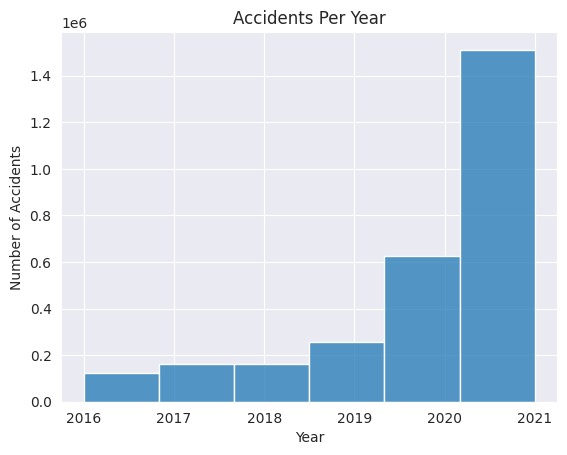

In [ ]:
sns.histplot(df.Year, bins = 6).set(xlabel='Year', ylabel='Number of Accidents',title = "Accidents Per Year")

[Text(0.5, 0, 'Hour of Day'),
 Text(0, 0.5, 'Number of Accidents'),
 Text(0.5, 1.0, 'Percentage of Accidents per hour of a day')]

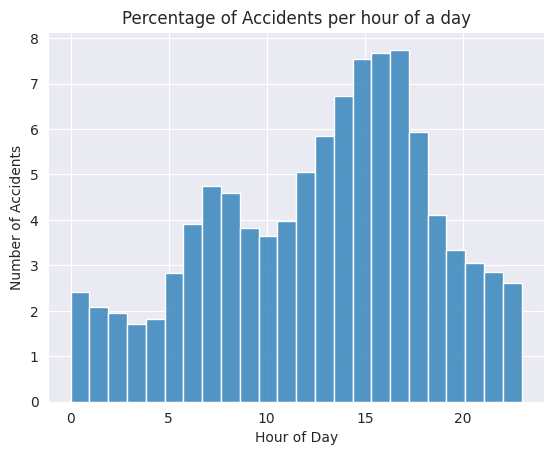

In [ ]:
sns.histplot(df.Start_Time.dt.hour,bins = 24, kde = False,stat = 'percent').set(xlabel='Hour of Day', ylabel='Number of Accidents', title="Percentage of Accidents per hour of a day")

[Text(0.5, 0, 'Days(0=Mon)'),
 Text(0, 0.5, 'Number of Accidents'),
 Text(0.5, 1.0, 'Accidents Per Day of Week')]

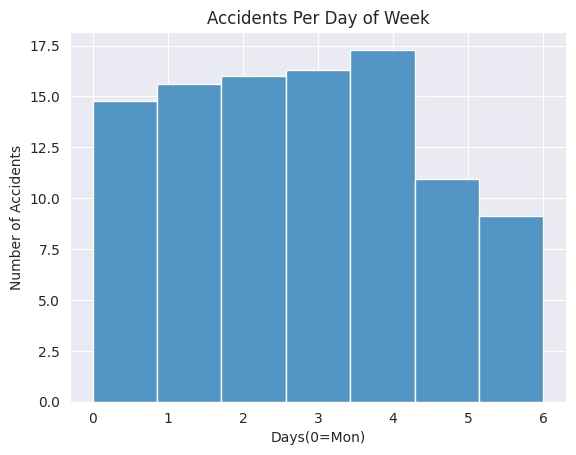

In [ ]:
sns.histplot(df.Start_Time.dt.dayofweek,bins = 7, kde = False, stat = 'percent').set(xlabel='Days(0=Mon)', ylabel='Number of Accidents',title="Accidents Per Day of Week")

Distribution by hour on weekends and weekdays

[Text(0.5, 0, 'Hour of Day'),
 Text(0, 0.5, 'Number of Accidents'),
 Text(0.5, 1.0, 'Accidents Per Hour On Saturdays')]

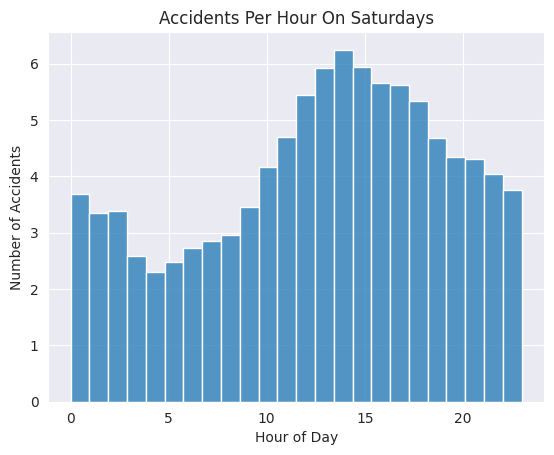

In [ ]:
sns.histplot(df.Start_Time[df.Start_Time.dt.dayofweek == 5].dt.hour, bins = 24, kde = False, stat = 'percent').set(xlabel='Hour of Day', ylabel='Number of Accidents',title='Accidents Per Hour On Saturdays')

[Text(0.5, 0, 'Hour of Day'),
 Text(0, 0.5, 'Number of Accidents'),
 Text(0.5, 1.0, 'Accidents Per Hour On Sundays')]

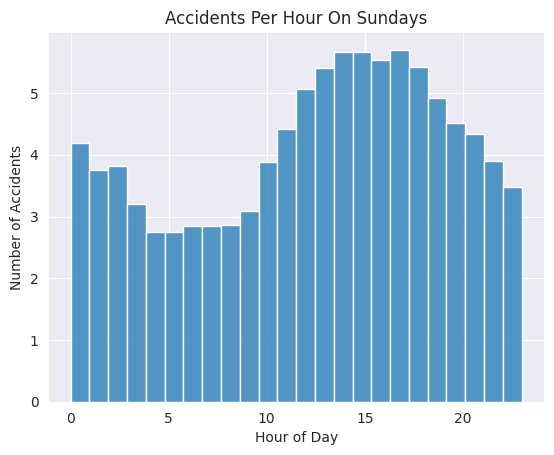

In [ ]:
sns.histplot(df.Start_Time[df.Start_Time.dt.dayofweek == 6].dt.hour, bins = 24, kde = False, stat = 'percent').set(xlabel='Hour of Day', ylabel='Number of Accidents',title='Accidents Per Hour On Sundays')

[Text(0.5, 0, 'Hour of Day'),
 Text(0, 0.5, 'Number of Accidents'),
 Text(0.5, 1.0, 'Accidents Per Hour On Mondays')]

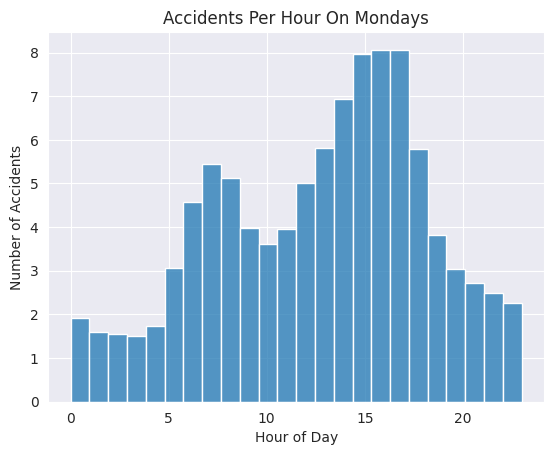

In [ ]:
sns.histplot(df.Start_Time[df.Start_Time.dt.dayofweek == 0].dt.hour, bins = 24, kde = False, stat = 'percent').set(xlabel='Hour of Day', ylabel='Number of Accidents',title='Accidents Per Hour On Mondays')

[Text(0.5, 0, 'Hour of Day'),
 Text(0, 0.5, 'Number of Accidents'),
 Text(0.5, 1.0, 'Accidents Per Hour On Tuesdays')]

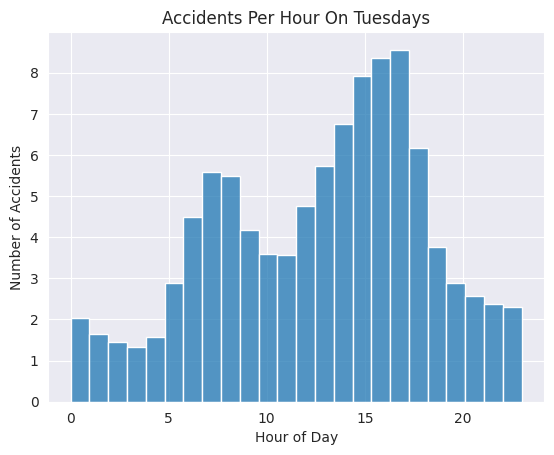

In [ ]:
sns.histplot(df.Start_Time[df.Start_Time.dt.dayofweek == 1].dt.hour, bins = 24, kde = False, stat = 'percent').set(xlabel='Hour of Day', ylabel='Number of Accidents',title='Accidents Per Hour On Tuesdays')

[Text(0.5, 0, 'Hour of Day'),
 Text(0, 0.5, 'Number of Accidents'),
 Text(0.5, 1.0, 'Accidents Per Hour On Wednesdays')]

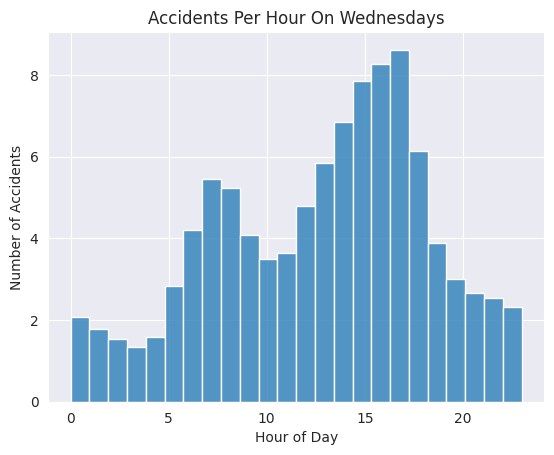

In [ ]:
sns.histplot(df.Start_Time[df.Start_Time.dt.dayofweek == 2].dt.hour, bins = 24, kde = False, stat = 'percent').set(xlabel='Hour of Day', ylabel='Number of Accidents',title='Accidents Per Hour On Wednesdays')

[Text(0.5, 0, 'Hour of Day'),
 Text(0, 0.5, 'Number of Accidents'),
 Text(0.5, 1.0, 'Accidents Per Hour On Thursdays')]

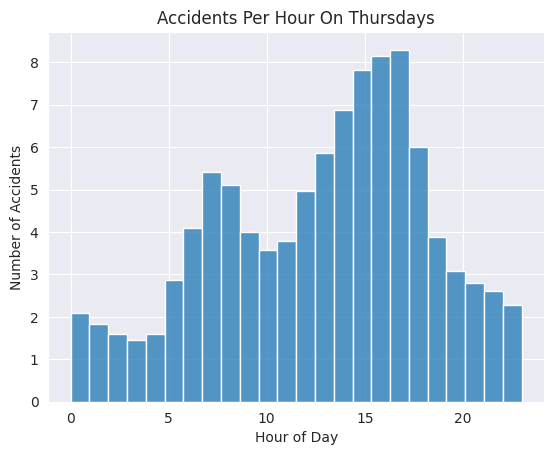

In [ ]:
sns.histplot(df.Start_Time[df.Start_Time.dt.dayofweek == 3].dt.hour, bins = 24, kde = False, stat = 'percent').set(xlabel='Hour of Day', ylabel='Number of Accidents',title='Accidents Per Hour On Thursdays')

[Text(0.5, 0, 'Hour of Day'),
 Text(0, 0.5, 'Number of Accidents'),
 Text(0.5, 1.0, 'Accidents Per Hour On Fridays')]

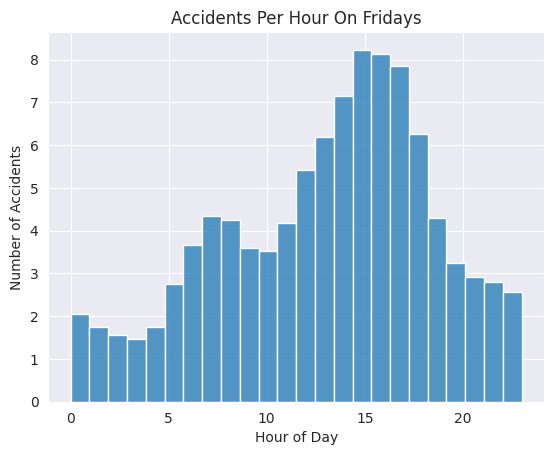

In [ ]:
sns.histplot(df.Start_Time[df.Start_Time.dt.dayofweek == 4].dt.hour, bins = 24, kde = False, stat = 'percent').set(xlabel='Hour of Day', ylabel='Number of Accidents',title='Accidents Per Hour On Fridays')

On weekends, the peak is 12PM to 6PM unlike weekdays

Yearly trends in the number of accidents

In [ ]:
df.Start_Time.dt.year.value_counts()

2021    1511745
2020     625864
2019     258615
2017     163918
2018     163176
2016     122024
Name: Start_Time, dtype: int64

[Text(0.5, 0, 'Months'),
 Text(0, 0.5, 'Number of Accidents'),
 Text(0.5, 1.0, '2016')]

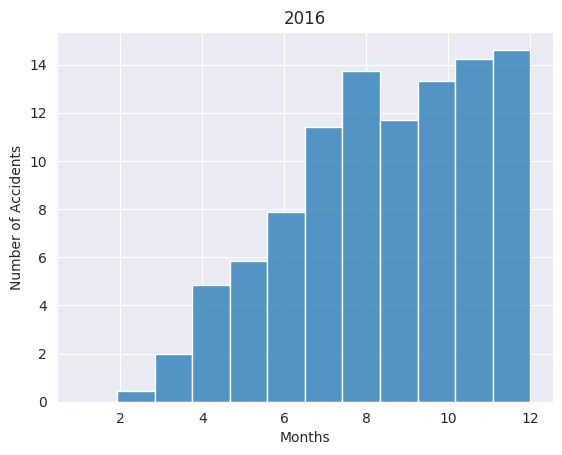

In [ ]:
sns.histplot(df[df.Start_Time.dt.year == 2016].Start_Time.dt.month, bins = 12, kde = False, stat = 'percent').set(xlabel='Months', ylabel='Number of Accidents',title='2016')

[Text(0.5, 0, 'Months'),
 Text(0, 0.5, 'Number of Accidents'),
 Text(0.5, 1.0, '2017')]

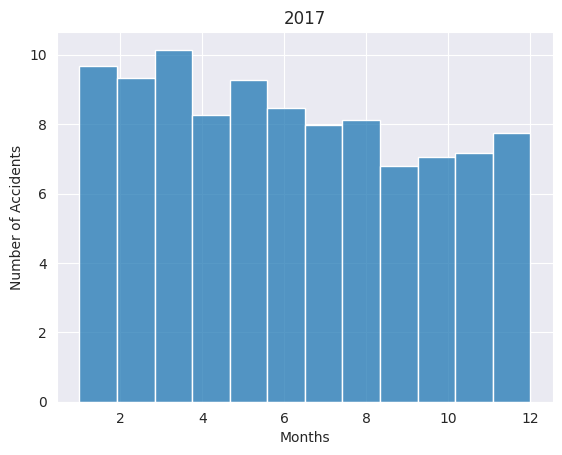

In [ ]:
sns.histplot(df[df.Start_Time.dt.year == 2017].Start_Time.dt.month, bins = 12, kde = False, stat = 'percent').set(xlabel='Months', ylabel='Number of Accidents',title='2017')

[Text(0.5, 0, 'Months'),
 Text(0, 0.5, 'Number of Accidents'),
 Text(0.5, 1.0, '2018')]

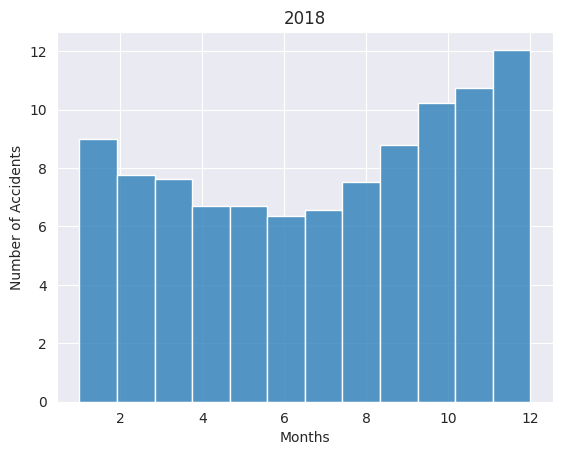

In [ ]:
sns.histplot(df[df.Start_Time.dt.year == 2018].Start_Time.dt.month, bins = 12, kde = False, stat = 'percent').set(xlabel='Months', ylabel='Number of Accidents',title='2018')

[Text(0.5, 0, 'Months'),
 Text(0, 0.5, 'Number of Accidents'),
 Text(0.5, 1.0, '2019')]

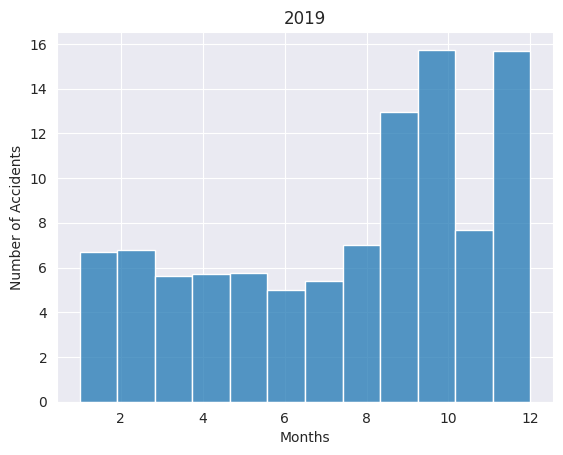

In [ ]:
sns.histplot(df[df.Start_Time.dt.year == 2019].Start_Time.dt.month, bins = 12, kde = False, stat = 'percent').set(xlabel='Months', ylabel='Number of Accidents',title='2019')

[Text(0.5, 0, 'Months'),
 Text(0, 0.5, 'Number of Accidents'),
 Text(0.5, 1.0, '2020')]

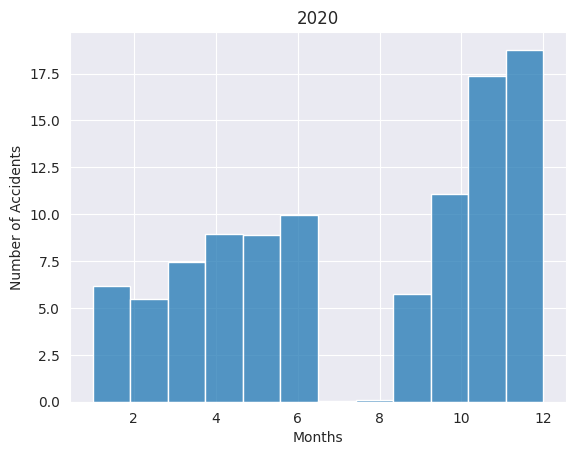

In [ ]:
sns.histplot(df[df.Start_Time.dt.year == 2020].Start_Time.dt.month, bins = 12, kde = False, stat = 'percent').set(xlabel='Months', ylabel='Number of Accidents',title='2020')

[Text(0.5, 0, 'Months'),
 Text(0, 0.5, 'Number of Accidents'),
 Text(0.5, 1.0, '2021')]

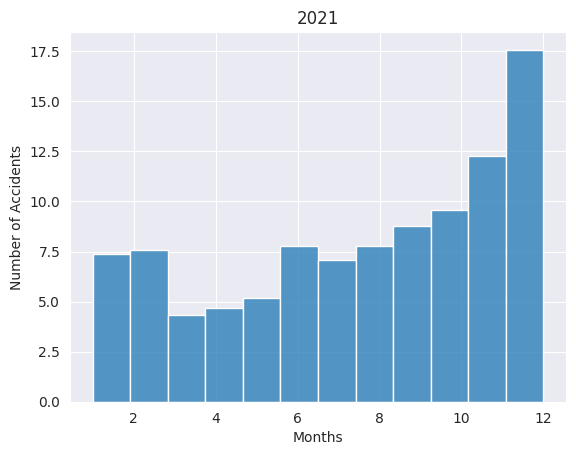

In [ ]:
sns.histplot(df[df.Start_Time.dt.year == 2021].Start_Time.dt.month, bins = 12, kde = False, stat = 'percent').set(xlabel='Months', ylabel='Number of Accidents',title='2021')

1. It is seen that Acccidents are higher in Winter months
2. There is some missing data for 2016.
3. In 2017 there seems to be higher number of accidents in the starting months of the year.
4. In 2020 there is no report of accident for one month, this maybe due the the Covid-19 quarantine or there is some falut in data collection which caused missing data.

### Start Latitude and Longitude

In [ ]:
df.Start_Lat

0          40.108910
1          39.865420
2          39.102660
3          41.062130
4          39.172393
             ...    
2845337    34.002480
2845338    32.766960
2845339    33.775450
2845340    33.992460
2845341    34.133930
Name: Start_Lat, Length: 2845342, dtype: float64

In [ ]:
df.Start_Lng

0          -83.092860
1          -84.062800
2          -84.524680
3          -81.537840
4          -84.492792
              ...    
2845337   -117.379360
2845338   -117.148060
2845339   -117.847790
2845340   -118.403020
2845341   -117.230920
Name: Start_Lng, Length: 2845342, dtype: float64

[Text(0.5, 0, 'Longitude'),
 Text(0, 0.5, 'Latitude'),
 Text(0.5, 1.0, 'Scatterplot Showing the Location of Accidents')]

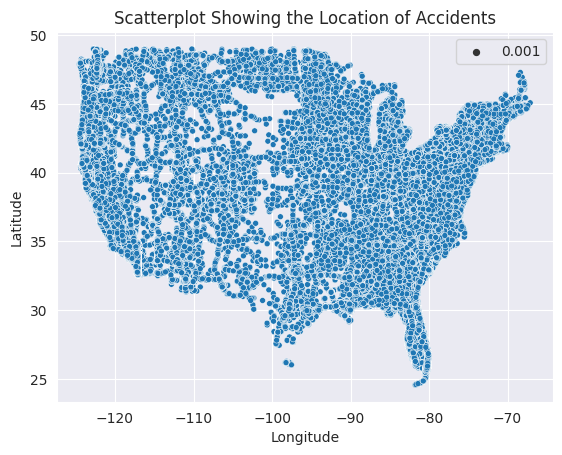

In [ ]:
sns.scatterplot(x=df.Start_Lng, y=df.Start_Lat, size=0.001).set(xlabel='Longitude', ylabel='Latitude',title='Scatterplot Showing the Location of Accidents')

Plotting the cordinates on a interactive map

Map takes a list of the coordinates to plot. I have created a sample from the complete dataframe because plotting 2.4 Billion entries on the map has a very high runtime.

In [ ]:
zip(list(df.Start_Lat), list(df.Start_Lng))

In [ ]:
from folium.plugins import HeatMap

In [ ]:
sample_df = df.sample(int(0.001 * len(df)))
lat_lon_pairs = list(zip(list(sample_df.Start_Lat), list(sample_df.Start_Lng)))

In [ ]:
map = folium.Map()
HeatMap(lat_lon_pairs).add_to(map)
map



---



---



## Insights and Conclusions
- There is data about 11628 cities.
- Miami has the highest number of accidents (106966), followed by Los Angeles (68956), Orlando (54691), Dallas (41979) and Houston (39448).
- No data for New York, even though it is the most populous city in US.
- There are over 1110 cities with exactly one accident reported.
- Less than 5% cities (494) have more than 1000 number of accidents.
- More than 95% cities (11187) have 1000 and less than 1000 number of accidents.
- 2021 has the highest number of accidents reported (1511745).
- On an average, High Percentage of accidents occur between 1 PM to 5 PM.
- Weekdays have more accident reports than weekends.
- On weekdays the trend of number of accidents has two maximas (7AM to 9AM) and (3PM to 5PM).
- On weekends between 12 PM and 6 PM, there are more accident reports.
- More number of accidents occur in winters.
- There is some missing data for the year 2016.
- In 2017, there are more number of accidents in the starting of the year.
- In 2020, data for a month is either missing or that month has 0 number of accidents reported. This maybe due to the COVID-19 quarantine.  
